# **Chapter 1 신경망 복습**

## **1.1 수학과 파이썬 복습**

### **1.1.1 벡터와 행렬**

벡터는 크기와 방향을 가진 양이다. 벡터는 숫자가 일렬로 늘어선 집합으로 표현할 수 있고, 파이썬에서는 1차원 배열로 취급할 수 있다. 그에 반해 행렬은 숫자가 2차원 형태(사각형 형상)로 늘어선 것이다. 

벡터를 표현하는 방법은 두 가지이다. 하나는 숫자들을 세로로 나열하는 방법(열벡터)이고, 다른 하나는 가로로 나열하는 방법(행벡터)이다. 파이썬으로 구현할 때 벡터를 행벡터로 취급할 경우, 벡터를 가로 방향 행렬로 변환해 사용하면 명확해진다.

In [0]:
import numpy as np

x=np.array([1,2,3])
x.__class__

numpy.ndarray

np.array() 메서드를 이용해 벡터와 행렬을 생성할 수 있다. 이 메서드는 넘파이의 다차원 배열 클래스인 np.ndarray 클래스를 생성한다. 

In [0]:
x.shape # 다차원 배열의 형상

(3,)

In [0]:
x.ndim # 차원 수

1

In [0]:
W = np.array([[1,2,3],[4,5,6]])

In [0]:
W.shape

(2, 3)

2x3 행렬이다.

In [0]:
W.ndim

2

2차원이다.

### **1.1.2 행렬의 원소별 연산**

In [0]:
W = np.array([[1,2,3],[4,5,6]])
X = np.array([[0,1,2],[3,4,5]])

In [0]:
W+X

array([[ 1,  3,  5],
       [ 7,  9, 11]])

In [0]:
W*X

array([[ 0,  2,  6],
       [12, 20, 30]])

피연산자인 다차원 배열들에서 서로 대응하는 원소끼리(각 원소가 독립적으로) 연산이 이루어졌다. 이것이 넘파이 배열의 '원소별 연산'이다.

### **1.1.3 브로드캐스트**

넘파이의 다차원 배열에서는 형상이 다른 배열끼리도 연산할 수 있다.

In [0]:
A = np.array([[1,2],[3,4]])
A*10

array([[10, 20],
       [30, 40]])

2x2 행렬에 스칼라 값을 곱할 수 있다. 스칼라 값 10이 2x2 행렬로 확장되어 원소별 연산이 이루어진다. (다차원 배열의 각 원소에 스칼라 값이 곱해지게 됨)

In [0]:
A = np.array([[1,2],[3,4]])
b = np.array([10,20])
A*b

array([[10, 40],
       [30, 80]])

1차원 배열인 b가 A와 형상이 같아지도록 확장되어 계산이 이루어졌다.

### **1.1.4 벡터의 내적과 행렬의 곱**

벡터의 내적은 두 벡터에서 대응하는 원소들의 곱을 모두 더한 것이다.
___
행렬의 곱은 왼쪽 행렬의 행벡터와 오른쪽 행렬의 열벡터의 내적(원소별 곱의 합)으로 계산한다. 그리고 계산 결과는 새로운 행렬의 대응하는 원소에 저장된다. 

In [0]:
# 벡터의 내적
a = np.array([1,2,3])
b = np.array([4,5,6])
np.dot(a,b)

32

In [0]:
np.matmul(a,b)

32

In [0]:
# 행렬의 곱
A = np.array([[1,2],[3,4]])
B = np.array([[5,6],[7,8]])
np.matmul(A,B)

array([[19, 22],
       [43, 50]])

In [0]:
np.dot(A,B)

array([[19, 22],
       [43, 50]])

위의 경우에는 np.dot()과 np.matmul()의 연산 결과가 모두 동일했다. 그러나 np.dot()은 두 배열의 내적곱을 계산해주는 메서드인 반면 np.matmul()은 두 배열의 행렬곱을 계산해준다. 이 둘은 3차원 이상의 행렬을 곱할 때는 서로 다른 결과를 보여주게 되므로 둘을 구분하여 쓰는 것이 낫다.

### **1.1.5 행렬 형상 확인**

행렬 곱을 할 때는 형상 확인을 통해 대응하는 차원의 원소 수가 같은지를 확인해주어야 한다. 예를 들어 3x2 행렬과 2x4 행렬은 대응하는 차원의 원소 수가 2로 같으므로 행렬 곱이 가능하다. 행렬 곱의 결과로 만들어진 새로운 행렬은 3x4 행렬이 된다.

In [0]:
A = np.array([[1,2],[3,4],[5,6]])
B = np.array([[1,2,3,4],[5,6,7,8]])

In [0]:
A.shape

(3, 2)

In [0]:
B.shape

(2, 4)

In [0]:
np.matmul(A,B)

array([[11, 14, 17, 20],
       [23, 30, 37, 44],
       [35, 46, 57, 68]])

## **1.2 신경망의 추론**

신경망에서 수행하는 작업은 '학습'과 '추론'의 두 단계로 나눌 수 있다. 

p.30~32 신경망 예시 참고

In [0]:
import numpy as np
W1 = np.random.randn(2,4) # 가중치
b1 = np.random.randn(4) # 편향
x = np.random.randn(10,2) # 입력
h = np.matmul(x,W1) + b1

완전연결계층에 의한 변환의 미니배치 버전을 구현했다.
___
그런데 완전연결계층에 의한 변환은 '선형 변환'이다. 여기에 비선형 효과를 부여하는 것이 바로 활성화 함수이다. 비선형 활성화 함수를 이용해 신경망의 표현력을 높일 수 있다. 

In [0]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [0]:
a = sigmoid(h)

시그모이드 함수를 사용하여 은닉층 뉴런을 변환하였다. 계속해서 이 활성화 함수의 출력인 a를 또 다른 완전연결계층에 통과시켜 변환한다. 이것으로 출력층의 뉴런을 얻을 수 있다.

In [0]:
import numpy as np

def sigmoid(x):
  return 1/(1+np.exp(-x))

x = np.random.randn(10,2) # 입력
W1 = np.random.randn(2,4) # 가중치1
b1 = np.random.randn(4) # 편향1
W2 = np.random.randn(4,3) # 가중치2
b2 = np.random.randn(3) # 편향2

h = np.matmul(x,W1) + b1 # 입력x가중치1 + 편향1
a = sigmoid(h) # 활성화
s = np.matmul(a,W2) + b2 # 입력x가중치2 + 편향2

예시로 든 신경망을 종합적으로 구현했다.

### **1.2.2 계층으로 클래스화 및 순전파 구현**

신경망에서 하는 처리를 계층으로 구현해본다. 완전연결계층에 의한 변환을 Affine 계층으로, 시그모이드 함수에 의한 변환을 Sigmoid 계층으로 구현한다. 
___
계층 구현 시 따라야 하는 규칙 두 가지:
 1. 모든 계층은 forward()와 backward() 메서드를 가진다.
 2. 모든 계층은 인스턴스 변수인 params와 grads를 가진다. 
___
forward()와 backward() 메서드는 각각 순전파와 역전파를 수행한다. 입력층에서 출력층으로 처리 결과를 차례로 전파해가는 것이 순전파, 기울기를 순전파와는 반대 방향으로 전파하는 것이 역전파이다. 

params는 가중치와 편향 같은 매개변수를 담는 리스트이다. 매개변수는 여러 개가 있을 수 있어서 리스트에 보관한다. grads는 params에 저장된 각 매개변수에 대응하여, 해당 매개변수의 기울기를 보관하는 리스트이다.


In [0]:
import numpy as np

class Sigmoid:
  def __init__(self):
    self.params=[] # 학습하는 매개변수가 따로 없으므로 params는 빈 리스트로 초기화했다.

  def forward(self,x):
    return 1 / (1+np.exp(-x))

시그모이드 계층을 구현했다.

In [0]:
class Affine: 
  def __init__(self,W,b):
    self.params = [W,b]

  def forward(self,x):
    W,b = self.params
    out = np.matmul(x,W) + b
    return out

Affine 계층을 구현했다. Affine 계층은 초기화될 때 가중치와 편향을 받는다. 즉 가중치와 편향은 Affine 계층의 배개변수이며 이 두 매개변수는 신경망이 학습될 때 수시로 갱신된다. 

forward(x)는 순전파 처리를 구현한다.

In [0]:
class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size):
    I,H,O = input_size, hidden_size, output_size

    # 가중치와 편향 초기화
    W1 = np.random.randn(I,H)
    b1 = np.random.randn(H)
    W2 = np.random.randn(H,O)
    b2 = np.random.randn(O)

    # 계층 생성
    self.layers = [
       Affine(W1,b1),
       Sigmoid(),
       Affine(W2,b2)
    ]

    #모든 가중치를 리스트에 모은다.
    self.params = []
    for layer in self.layers:
      self.params += layer.params
    
  def predict(self,x):
    for layer in self.layers:
      x=layer.forward(x)
    return x

최과 메서드로 먼저 가중치를 초기화하고 3개의 계층을 생성했다. 마지막으로는 학습해야 할 가중치 매개변수들을 params 리스트에 저장했다. 매개변수들을 하나의 리스트에 보관하면 매개변수 갱신과 매개변수 저장을 손쉽게 처리할 수 있다.

In [0]:
a = ['A','B']
a += ['C','D']
a

['A', 'B', 'C', 'D']

이처럼 + 연산자는 리스트들을 결합해준다. TwoLayerNet의 구현에서 각 계층의 params 리스트를 더해주어 모든 학습 매개변수를 하나의 리스트에 담은 것과 같은 원리다. 

In [0]:
x = np.random.randn(10,2)
model = TwoLayerNet(2,4,3)
s = model.predict(x)

In [0]:
s

array([[ 0.92012778,  0.09157693, -3.34184714],
       [-0.12553199,  0.09792607, -3.39008552],
       [ 1.25165076,  0.26119198, -3.35554848],
       [ 1.15171427,  0.07852073, -3.32074562],
       [ 0.62669916, -0.32185263, -3.53445834],
       [ 0.67173164,  0.13898902, -3.37823353],
       [ 0.92886492, -0.01637214, -3.32040586],
       [ 1.29054898,  0.65847687, -3.47678272],
       [ 1.25925369,  0.30943014, -3.37557145],
       [ 0.77319994,  0.28154284, -3.40667252]])

신경망의 추론을 수행했다.

## **1.3 신경망의 학습**

1.3.1부터 1.3.4의 '분기 노드'까지(p.39~49)는 교재 참고

### **1.3.4 계산 그래프**

**Repeat 노드**

Repeat 노드는 분기 노드를 일반화한 것으로, 2개가 아닌 N개로 분기(복제)되는 노드를 말한다.

In [0]:
import numpy as np

D,N = 8,7
x = np.random.randn(1,D) # 입력
y = np.repeat(x,N,axis=0) # 순전파
dy = np.random.randn(N,D) # 무작위 기울기
dx = np.sum(dy,axis=0,keepdims=True) # 역전파 # 역전파될 때 기울기를 모두 더하는 것을 구현

In [0]:
y

array([[-1.02437981, -1.14604593,  0.36461882, -1.84305614,  0.63622896,
        -0.09799527, -0.41492896,  1.38913312],
       [-1.02437981, -1.14604593,  0.36461882, -1.84305614,  0.63622896,
        -0.09799527, -0.41492896,  1.38913312],
       [-1.02437981, -1.14604593,  0.36461882, -1.84305614,  0.63622896,
        -0.09799527, -0.41492896,  1.38913312],
       [-1.02437981, -1.14604593,  0.36461882, -1.84305614,  0.63622896,
        -0.09799527, -0.41492896,  1.38913312],
       [-1.02437981, -1.14604593,  0.36461882, -1.84305614,  0.63622896,
        -0.09799527, -0.41492896,  1.38913312],
       [-1.02437981, -1.14604593,  0.36461882, -1.84305614,  0.63622896,
        -0.09799527, -0.41492896,  1.38913312],
       [-1.02437981, -1.14604593,  0.36461882, -1.84305614,  0.63622896,
        -0.09799527, -0.41492896,  1.38913312]])

길이가 8인 배열을 7개로 복제하는 Repeat 노드를 구현하였다. np.repeat() 메서드가 원소 복제를 수행해준다. 여기서 axis를 지정하여 어느 축 방향으로 복제할지를 조정할 수 있다. 역전파에서는 총합을 구해야 해서 np.sum() 메서드를 이용했고, 여기서도 axis 인수를 설정하여 어느 축 방향으로 합을 구할지 지정한다. 또한 인수로 keepdims=True를 설정하여 2차원 배열의 차원 수를 유지한다. 이 예에서는 keepdims가 True여서 (1,D)로 형상이 유지되지만, False로 지정하면 (D)가 된다.

**Sum 노드**

Sum 노드는 범용 덧셈 노드이다. Sum 노드의 역전파는 상류로부터의 기울기를 모든 화살표에 분배한다. 덧셈 노드의 역전파를 자연스럽게 확장한 것이다. 

In [0]:
import numpy as np
D,N = 8,7
x = np.random.randn(N,D) # 입력
y = np.sum(x,axis=0,keepdims=True) # 순전파

dy = np.random.randn(1,D) # 무작위 기울기
dx = np.repeat(dy,N,axis=0) # 역전파

Sum 노드를 구현했다. 순전파에서는 np.sum() 메서드를 이용해주었고, 역전파는 np.repeat() 메서드로 구현했다. 여기서 체크할 부분은 Sum 노드와 Repeat 노드가 서로 반대 관계라는 것이다. Sum 노드의 순전파가 Repeat 노드의 역전파가 되며, Sum 노드의 역전파가 Repeat 노드의 순전파가 된다. 

**MatMul 노드**

MatMul 노드에 관한 설명은 교재 p.51~54 참고

In [0]:
class MatMul:
  def __init__(self,W):
    self.params = [W]
    self.grads = [np.zeros_like(W)]
    self.x = None

  def forward(self,x):
    W, = self.params
    out = np.matmul(x,W)
    self.x = x
    return out

  def backward(self,dout):
    W, = self.params
    dx = np.matmul(dout,W.T)
    dW = np.matmul(self.x.T,dout)
    self.grads[0][...] = dW
    return dx

MatMul 노드를 구현했다. MatMul 계층은 학습하는 매개변수를 params에 보관한다. 그리고 거기에 대응시키는 형태로, 기울기는 grads에 보관한다. 역전파에서는 dx와 dW를 구해 가중치의 기울기를 인스턴스 변수인 grads에 저장했다. 

참고로, 기울기 값을 설정하는 self.grads[0][...] = dW 코드에서 점 3개로 이루어진 생략 기호를 사용했다. 이렇게 하면 넘파이 배열이 가리키는 메모리 위치를 고정시킨 다음, 그 위치에 원소들을 덮어쓴다. grads[0] = dW 처럼 할당하게 되면 얕은 복사가 이루어지게 되고, 생략 기호를 이용해서 덮어쓰면 깊은 복사가 이루어진다. 

In [0]:
a = np.array([1,2,3])
b = np.array([4,5,6])

교재 p.55의 설명을 참고한다. 

### **1.3.5 기울기 도출과 역전파 구현**

**Sigmoid 계층**

설명은 교재 p.56 참고

In [0]:
class Sigmoid:
  def __init__(self):
    self.params,self.grads=[],[]
    self.out = None

  def forward(self,x):
    out = 1 / (1+np.exp(-x)) # 출력을 인스턴스 변수 out에 저장했다. 
    self.out = out 
    return out

  def backward(self,dout):
    dx = dout*(1.0-self.out)*self.out # self.out에 저장해둔 out 값을 이용했다. 
    return dx 

Sigmoid 계층을 구현했다.

**Affine 계층**

Affine 계층의 순전파는 y = np.matmul(x,W) + b로 구현할 수 있다. 여기서 편향을 더할 때는 넘파이의 브로드캐스트가 사용된다. (계산 그래프로 그렸을 때, Repeat 노드가 수행하는 복제가 넘파이의 브로드캐스트 기능에 해당함 / 계산 그래프는 교재 p.58 참고)

In [0]:
class Affine:
  def __init__(slef,W,b):
    self.params = [W,b]
    self.grads = [np.zeros_like(W),np.zeros_like(b)]
    self.x = None

  def forward(self,x):
    W,b = self.params
    out = np.matmul(x,W) + b
    self.x = x
    return out

  def backward(self,dout):
    W,b = self.params
    dx = np.matmul(dout,W.T)
    dW = np.matmul(self.x.T,dout)
    db = np.sum(dout, axis=0)

    self.grads[0][...] = dW
    self.grads[1][...] = db
    return dx

Affine 계층을 구현했다. 인스턴스 변수 params에는 매개변수를, grads에는 기울기를 저장했다. Affine의 역전파는 MatMul 노드와 Repeat 노드의 역전파를 수행하면 구할 수 있다. Repeat 노드의 역전파는 np.sum() 메서드로 계산할 수 있는데, 이 때 행렬의 형상을 잘 살펴보고 어느 축(axis)으로 합을 구할지를 명시해야 한다. 마지막으로, 가중치 매개변수의 기울기를 인스턴스 변수 grads에 저장한다. 

**Softmax with Loss 계층**

소프트맥스 함수와 교차 엔트로피 오차는 Softmax with Loss 라는 하나의 계층으로 구현할 것이다. 소프트맥스 계층은 입력을 받아 정규화하여 출력해주고, Cross Entropy Error 계층은 Softmax의 출력과 정답 레이블을 받아 이 데이터로부터 손실 L을 구해 출력해준다.

계산 그래프는 교재 p.59 참고

### **1.3.6 가중치 갱신**

오차 역전파법으로 기울기를 구했으면, 그 기울기를 사용해 신경망의 매개변수를 갱신한다. 이 때 신경망의 학습은 다음 순서로 수행한다.
___
 1. 미니배치: 훈련 데이터 중에서 무작위로 다수의 데이터를 골라낸다.
 2. 기울기 계산: 오차역전파법으로 각 가중치 매개변수에 대한 손실 함수의 기울기를 구한다.
 3. 매개변수 갱신: 기울기를 사용하여 가중치 매개변수를 갱신한다. 오차역전파법으로 얻은 기울기는 손실을 가장 크게 하는 방향을 가리키므로 매개변수를 그 기울기와 반대 방향으로 갱신하면 손실을 줄일 수 있다. 이것을 경사하강법이라고 한다.
 4. 1~3단계를 필요한 만큼 반복한다.
 ___
 3단계에서 수행하는 가중치 갱신 기법의 종류는 아주 다양한데, 가장 단순한 것은 확률적경사하강법(SGD)이다. 참고로, '확률적'은 무작위로 선택된 데이터(미니배치)에 대한 기울기를 이용한다는 뜻이다. SGD는 가중치를 기울기 방향으로 일정한 거리만큼 갱신한다. 
 

In [0]:
class SGD:
  def __init__(self,lr=0.01):
    self.lr = lr

  def update(self,params,grads):
    for i in range(len(params)):
      params[i] -= self.lr*grad[i]

SGD를 구현했다. 초기화 인수 lr은 학습률을 뜻하고, 그 값을 인스턴스 변수로 저장해둔다. 그리고 update(params,grads) 메서드는 매개변수 갱신을 처리한다. 

## **1.4 신경망으로 문제를 풀다**

### **1.4.1 스파이럴 데이터셋**

In [0]:
import sys
sys.path.append('..') # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import spiral
import matplotlib.pyplot as plt

x,t = spiral.load_data()

In [0]:
print('x',x.shape) 

x (300, 2)


300개의 샘플 데이터를 담고 있는 2차원 데이터

In [0]:
print('t',t.shape)

t (300, 3)


300개의 샘플 데이터를 담고 있는 3차원 데이터

### **1.4.2 신경망 구현**

은닉층이 하나인 신경망을 구현한다.

In [0]:
import sys
sys.path.append('..')
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

class TwoLayerNet:
  def __init__(self, input_size, hidden_size, output_size):
    I,H,O = input_size, hidden_size, output_size

    # 가중치와 편향 초기화
    W1 = 0.01 * np.random.randn(I,H)
    b1 = np.zeros(H)
    W2 = 0.01 * np.random.randn(H,O)
    b2 = np.zeros(O)

    # 계층 생성
    self.layers = [
       Affine(W1, b1),
       Sigmoid(),
       Affine(W2, b2)
    ]
    self.loss_layer = SoftmaxWithLoss()

    # 모든 가중치와 기울기를 리스트에 모은다.
    self.params, self.grads = [], []
    for layer in self.layers:
      self.params += layer.params
      self.grads += layer.grads
    
  def predict(self,x):
    for layer in self.layers:
      x = layer.forward(x)
    return x

  def forward(self,x,t):
    score = self.predict(x)
    loss = self.loss_layer.forward(score,t)
    return loss

  def backward(self,dout=1):
    dout = self.loss_layer.backward(dout)
    for layer in reversed(self.layers):
      dout = layer.backward(dout)
    return dout

초기화 메서드는 3개의 인수를 받는데, 차례대로 입력층의 뉴런 수, 은닉층의 뉴런 수, 출력층의 뉴런 수를 말한다. 메서드 안에서 우선 편향을 영벡터로 초기화하고(np.zeros() 사용), 가중치는 작은 무작위 값으로 초기화 한다. 가중치를 작은 무작위 값으로 설정하면 학습이 잘 진행될 가능성이 커진다. 계속해서 필요한 계층을 생성해 인스턴스 변수 layers에 모아두고, 마지막으로 이 모델에서 사용하는 매개변수들과 기울기들을 각각 하나로 모은다.

이어서 TwoLayerNet에 3개의 메서드를 구현해 넣는다. 추론을 수행하는 predict 메서드, 순전파를 담당하는 forward 메서드, 역전파를 담당하는 backward 메서드이다.

### **1.4.3 학습용 코드**

In [0]:
import sys
sys.path.append('..')
import numpy as np
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt
from two_layer_net import TwoLayerNet

# 1. 하이퍼파라미터 설정
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

# 2. 데이터 읽기, 모델과 옵티마이저 생성
x,t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

# 학습에 사용하는 변수
data_size = len(x)
max_iters = data_size//batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
  # 3. 데이터 뒤섞기 
  idx = np.random.permutation(data_size)
  x = x[idx]
  t = t[idx]

  for iters in range(max_iters):
    batch_x = x[iters*batch_size:(iters+1)*batch_size]
    batch_t = t[iters*batch_size:(iters+1)*batch_size]

  # 4. 기울기를 구해 매개변수 갱신 
  loss = model.forward(batch_x, batch_t)
  model.backward()
  optimizer.update(model.params,model.grads)

  total_loss += loss
  loss_count += 1

  # 5. 정기적으로 학습 경과 출력
  if (iters+1)%10 == 0:
    avg_loss = total_loss / loss_count
    print('|에폭%d| 반복%d/%d | 손실%.2f'
          %(epoch+1,iters+1,max_iters,avg_loss))
    loss_list.append(avg_loss)
    total_loss, loss_count = 0,0


|에폭1| 반복10/10 | 손실1.10
|에폭2| 반복10/10 | 손실1.12
|에폭3| 반복10/10 | 손실1.10
|에폭4| 반복10/10 | 손실1.08
|에폭5| 반복10/10 | 손실1.18
|에폭6| 반복10/10 | 손실1.22
|에폭7| 반복10/10 | 손실1.24
|에폭8| 반복10/10 | 손실1.13
|에폭9| 반복10/10 | 손실1.12
|에폭10| 반복10/10 | 손실1.20
|에폭11| 반복10/10 | 손실1.22
|에폭12| 반복10/10 | 손실1.22
|에폭13| 반복10/10 | 손실1.10
|에폭14| 반복10/10 | 손실1.12
|에폭15| 반복10/10 | 손실1.24
|에폭16| 반복10/10 | 손실1.32
|에폭17| 반복10/10 | 손실1.16
|에폭18| 반복10/10 | 손실1.10
|에폭19| 반복10/10 | 손실1.13
|에폭20| 반복10/10 | 손실1.12
|에폭21| 반복10/10 | 손실1.06
|에폭22| 반복10/10 | 손실1.42
|에폭23| 반복10/10 | 손실1.11
|에폭24| 반복10/10 | 손실1.17
|에폭25| 반복10/10 | 손실1.06
|에폭26| 반복10/10 | 손실1.24
|에폭27| 반복10/10 | 손실1.11
|에폭28| 반복10/10 | 손실1.11
|에폭29| 반복10/10 | 손실1.11
|에폭30| 반복10/10 | 손실1.13
|에폭31| 반복10/10 | 손실1.13
|에폭32| 반복10/10 | 손실1.24
|에폭33| 반복10/10 | 손실1.20
|에폭34| 반복10/10 | 손실1.08
|에폭35| 반복10/10 | 손실1.15
|에폭36| 반복10/10 | 손실1.10
|에폭37| 반복10/10 | 손실1.14
|에폭38| 반복10/10 | 손실1.13
|에폭39| 반복10/10 | 손실1.15
|에폭40| 반복10/10 | 손실1.34
|에폭41| 반복10/10 | 손실1.16
|에폭42| 반복10/10 | 손실1.13
|

학습을 수행하는 코드를 구현했다. 

1. 우선 하이퍼파라미터를 설정했다. 구체적으로는 학습하는 에폭 수, 미니배치 크기, 은닉층의 뉴런 수, 학습률을 설정했다.
2. 계속해서 데이터를 읽어 들이고, 신경망(모델)과 옵티마이저를 생성했다. 미리 만들어둔 TwoLayerNet과 구현해둔 SGD 클래스를 불러와서 이용했다. 학습은 미니배치 방식으로 진행되었고, 데이터를 무작위로 선택했다.
3. 에폭 단위로 데이터를 뒤섞고, 뒤섞은 데이터 중 앞에서부터 순서대로 뽑아내는 방식을 사용했다. 데이터의 인덱스를 뒤섞을 때 np.random.permutation() 메서드를 사용했다. 이 메서드에 인수로 N을 주면, 0에서부터 N-1까지의 무작위 순서를 생성해 반환한다. 

In [0]:
import numpy as np
np.random.permutation(10)

array([5, 1, 8, 4, 9, 7, 0, 2, 6, 3])

In [0]:
np.random.permutation(10)

array([3, 4, 2, 7, 8, 5, 6, 0, 9, 1])

np.random.permutation() 메서드를 사용해보았다. 이처럼 이 메서드를 호출하면 데이터 인덱스를 무작위로 뒤섞을 수 있다.

 4. 계속해서 기울기를 구해 매개변수를 갱신했다.
 5. 마지막으로, 정기적으로 학습 결과를 출력했다. 10번째 반복마다 손실의 평균을 구해 loss_list 변수에 추가하도록 했다.

결과를 보면 학습을 진행함에 따라 손실이 줄어들고 있음을 확인할 수 있다.

### **1.4.4 Trainer 클래스**

교재에서는 학습을 수행하는 역할을 Trainer 클래스로 제공한다. Trainer 클래스는 아래와 같이 사용하면 된다.

model = TwoLayerNet(...)

optimizer = SGD(lr=1.0)

trainer = Trainer(model, optimizer)


___
그리고 fit() 메서드를 호출해 학습을 시작하면 되는데, fit() 메서드가 받는 인수는 다음과 같다.

 1. x: 입력 데이터
 2. t: 정답 레이블
 3. max_epoch: 학습을 수행하는 에폭 수
 4. batch_size: 미니배치 크기 
 5. eval_interval: 결과(평균 손실 등)를 출력하는 간격
 6. max_grad: 기울기 최대 norm (기울기 norm이 이 값을 넘어서면 기울기를 줄인다. 이를 기울기 클리핑이라고 한다.)

| 에폭 1 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 2 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 3 |  반복 1 / 10 | 시간 0[s] | 손실 1.13
| 에폭 4 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 5 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 6 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 7 |  반복 1 / 10 | 시간 0[s] | 손실 1.14
| 에폭 8 |  반복 1 / 10 | 시간 0[s] | 손실 1.16
| 에폭 9 |  반복 1 / 10 | 시간 0[s] | 손실 1.11
| 에폭 10 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 11 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 12 |  반복 1 / 10 | 시간 0[s] | 손실 1.12
| 에폭 13 |  반복 1 / 10 | 시간 0[s] | 손실 1.10
| 에폭 14 |  반복 1 / 10 | 시간 0[s] | 손실 1.09
| 에폭 15 |  반복 1 / 10 | 시간 0[s] | 손실 1.08
| 에폭 16 |  반복 1 / 10 | 시간 0[s] | 손실 1.04
| 에폭 17 |  반복 1 / 10 | 시간 0[s] | 손실 1.03
| 에폭 18 |  반복 1 / 10 | 시간 0[s] | 손실 0.94
| 에폭 19 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 20 |  반복 1 / 10 | 시간 0[s] | 손실 0.92
| 에폭 21 |  반복 1 / 10 | 시간 0[s] | 손실 0.87
| 에폭 22 |  반복 1 / 10 | 시간 0[s] | 손실 0.85
| 에폭 23 |  반복 1 / 10 | 시간 0[s] | 손실 0.80
| 에폭 24 |  반복 1 / 10 | 시간 0[s] | 손실 0.79
| 에폭 25 |  반복 1 / 10 | 시간

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 48152 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 48373 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49892 missing from current font.
  font.set_text

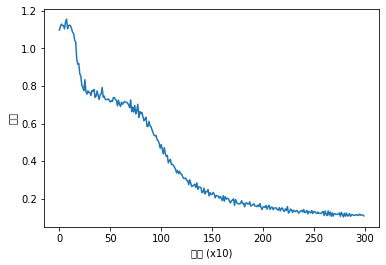

In [0]:
import sys
sys.path.append('..')
from common.optimizer import SGD
from common.trainer import Trainer
from dataset import spiral
from two_layer_net import TwoLayerNet

max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0
x,t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

trainer = Trainer(model,optimizer)
trainer.fit(x,t,max_epoch,batch_size,eval_interval=10)
trainer.plot()

Trainer 클래스를 사용해 학습을 수행했다. 결과에서 손실이 줄어드는 것을 확인했으며, fit()에서 기록한 손실을 plot() 메서드를 이용해 그래프로 그려주었다.

## **1.5 계산 고속화**

### **1.5.1 비트 정밀도**

In [1]:
import numpy as np
a = np.random.randn(3)
a.dtype

dtype('float64')

넘파이의 부동소수점 수는 기본적으로 64비트 데이터 타입을 사용한다. 위의 코드로 실제로 64비트 부동소수점 수가 사용됨을 확인했다.

그러나 신경망의 추론과 학습은 32비트 부동소수점 수로도 문제없이 수행할 수 있다. 32비트는 64비트의 절반이므로 메모리 관점에서는 항상 32비트가 더 좋다. 또, 신경망 계산 시 데이터를 전송하는 버스 대역폭이 병목이 되는 경우가 종종 있다. 이 경우에도 데이터 타입이 작은 것이 유리하다. 마지막으로 계산 속도 측면에서도 32비트 부동소수점 수가 일반적으로 더 빠르다. 

In [2]:
b = np.random.randn(3).astype(np.float32)
b.dtype

dtype('float32')

In [3]:
c = np.random.randn(3).astype('f')
c.dtype

dtype('float32')

넘파이에서 32비트 부동소수점 수를 사용하려면 위와 같이 데이터 타입을 np.float32나 f로 지정하면 된다. 

또한 신경망 추론으로 한정하면, 16비트 부동소수점 수를 사용해도 인식률이 거의 떨어지지 않는다. 넘파이에도 16비트 부동소수점 수가 준비되어 있다. 다만, 일반적으로 CPU와 GPU는 연산 자체를 32비트로 수행하기 때문에 16비트 부동소수점 수로 변환하더라도 계산 자체는 32비트로 이루어져 처리 속도에는 큰 차이가 없을 수 있다. 그러나 학습된 가중치를 저장하는 경우에는 16비트 부동소수점 수가 여전히 유효하다. 

### **1.5.2 GPU(쿠파이)**

딥러닝의 계산은 대량의 곱하기 연산으로 구성된다. 이 대량의 곱하기 연산 대부분은 병렬로 계산할 수 있는데, 이 점에서 CPU보다 GPU가 유리하다. 

쿠파이는 GPU를 이용해 병렬 계산을 수행해주는 라이브러리인데, 아쉽게도 엔비디아의 GPU에서만 동작한다. 또한, CUDA라는 GPU 전용 범용 병렬 컴퓨팅 플랫폼을 설치해야 한다. 쿠파이를 사용하면 간단하게 병렬 계산을 수행할 수 있다. 또한 쿠파이는 넘파이와 호환되는 API를 제공한다. 

import cupy as cp

x = cp.arange(6).reshape(2,3).astype('f')

이것이 쿠파이의 사용법이다. 사용법이 기본적으로 넘파이와 동일하다는 것을 알 수 있다. 다시 말해, 넘파이로 작성한 코드를 'GPU용'으로 변경하기가 아주 쉽다는 뜻이다. 그저 numpy를 cupy로 대체해주기만 하면 끝이다. 

In [0]:
x = np.arange(6).reshape(2,3).astype('f')

In [9]:
x

array([[0., 1., 2.],
       [3., 4., 5.]], dtype=float32)

In [10]:
x.sum(axis=1)

array([ 3., 12.], dtype=float32)